In [1]:
%cd
import os
import uproot4 as uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import pandas as pd
import awkward as ak
import logging
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.offsetbox import AnchoredText
import pprint
from pathlib import Path
import re
import ast
import json
from uncertainties import ufloat
from uncertainties.umath import *
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb

/home/rdhill13


In [2]:
class HistManager:
    def __init__(self):
        self.histograms = {}
    

    def clear(self):
        self.histograms = {}

    def add(self, df, name, x, cuts=[], nbins=100, range=[0,1], density=False):
        
        
        #branch = df[varString].ravel()
    
        mask = np.ones(len(x), dtype=bool)

        for cut in cuts:
            if len(mask) != len(cut):
                print("Error: existing bitmask and new cut bitmask have different sizes!")

            mask = np.bitwise_and(np.array(mask), np.array(cut))
        
        if name not in self.histograms:
            print(f"Creating histogram named {name} ... ")
            self.histograms[name] = np.histogram(x[mask], nbins, range, density=density)
        else:
            (hist, bins) = np.histogram(x[mask], nbins, range)
            newhist = np.sum([hist, self.histograms[name][0]], axis=0)
            self.histograms[name] = (newhist, self.histograms[name][1])
    
    def get_all(self):
        return self.histograms

    def get(self, name):
        return self.histograms[name]

    def get_hist(self, name):
        return self.histograms[name][0]
    
    def get_bins(self, name):
        return self.histograms[name][1]

# def HCALEnergy(row, eta_range=[-3.5,-1]):
#     # Primary theta and phi
#     primary_theta = row["PrimaryTheta"]
#     primary_phi = row["PrimaryPhi"]
    
#     primary_eta = -np.log(np.tan(primary_theta/2.0))
    
#     if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
#         return 0
    
#     dRmax = 1.0
#     TotalHCAL = 0.0

#     for system in ["HcalBarrel", "HcalHadronEndcap", "HcalElectronEndcap"]:
#         try:
#             cl_energy = row[f"{system}Clusters.energy"]
#             cl_theta  = row[f"{system}Clusters.polar.theta"]
#             cl_phi    = row[f"{system}Clusters.polar.phi"]
#             deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
#             TotalHCAL += np.sum(cl_energy[deltaR < dRmax])
#         except:
#             pass

        
#     return TotalHCAL

def HCALEnergyBarrel(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
    
    dRmax = 1.0
    TotalHCAL = 0.0

    for system in ["HcalBarrel"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalHCAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass

        
    return TotalHCAL

def HCALEnergyEndcapP(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
    
    dRmax = 1.0
    TotalHCAL = 0.0

    for system in ["HcalEndcapP"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalHCAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass

        
    return TotalHCAL

def HCALEnergyEndcapN(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
    
    dRmax = 1.0
    TotalHCAL = 0.0

    for system in ["HcalEndcapN"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalHCAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass
        
    return TotalHCAL


# def ECALEnergy(row, eta_range=[-3.5,-1]):
#     # Primary theta and phi
#     primary_theta = row["PrimaryTheta"]
#     primary_phi = row["PrimaryPhi"]
    
#     primary_eta = -np.log(np.tan(primary_theta/2.0))
    
#     if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
#         return -1.0
        
#     dRmax = 1.0
#     TotalECAL = 0.0
    
#     for system in ["EcalBarrel", "EcalEndcapP", "EcalEndcapN"]:
#         try:
#             cl_energy = row[f"{system}Clusters.energy"]
#             cl_theta  = row[f"{system}Clusters.polar.theta"]
#             cl_phi    = row[f"{system}Clusters.polar.phi"]
#             deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
#             TotalECAL += np.sum(cl_energy[deltaR < dRmax])
#         except:
#             pass
        
#     return TotalECAL

def ECALEnergyBarrel(row, eta_range=[-3.5,-1]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
        
    dRmax = 1.0
    TotalECAL = 0.0
        
    for system in ["EcalBarrelImaging"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt(np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalECAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass
        
    return TotalECAL

def ECALEnergyEndcapP(row, eta_range=[0.76,3.64]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
        
    dRmax = 1.0
    TotalECAL = 0.0
    
    for system in ["EcalEndcapP"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalECAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass
        
    return TotalECAL

def ECALEnergyEndcapN(row, eta_range=[-3.64,-0.76]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0
    
    dRmax = 1.0
    TotalECAL = 0.0
    
    for system in ["EcalEndcapN"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalECAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass
            
    return TotalECAL

def ECALEnergyScFi(row, eta_range=[-0.88,0.88]):
    # Primary theta and phi
    primary_theta = row["PrimaryTheta"]
    primary_phi = row["PrimaryPhi"]
    
    primary_eta = -np.log(np.tan(primary_theta/2.0))
    
    if (primary_eta < eta_range[0] or primary_eta > eta_range[1]):
        return 0

    dRmax = 1.0
    TotalECAL = 0.0
    
    for system in ["EcalBarrelScFi"]:
        try:
            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]
            deltaR = np.sqrt( np.power(cl_theta - primary_theta,2) + np.power(cl_phi - primary_phi, 2))
            TotalECAL += np.sum(cl_energy[deltaR < dRmax])
        except:
            pass
        
    return TotalECAL


def PrimaryTrackTheta(row):
    mc_ID = row["mcparticles.pdgID"]
    mc_status = row["mcparticles.genStatus"]
    mc_g4 = row["mcparticles.g4Parent"]
    mc_vx = row["mcparticles.ps.x"]
    mc_vy = row["mcparticles.ps.y"]
    mc_vz = row["mcparticles.ps.z"]
    
    if len(mc_g4) == 0:
        return 0.0000001  # no event(s) will reach theta of 0. 
    else:
        isThrown = mc_g4 == 0 # mc_status# == 1  # mc_g4 == 0
        thrown_ID = mc_ID[isThrown]
        phi = np.arctan2(mc_vy[isThrown],mc_vx[isThrown])
        theta = np.arctan2(np.sqrt(mc_vx[isThrown]**2 + mc_vy[isThrown]**2), mc_vz[isThrown])
        return theta[0]

def PrimaryTrackPhi(row):
    mc_ID = row["mcparticles.pdgID"]
    mc_status = row["mcparticles.genStatus"]
    mc_g4 = row["mcparticles.g4Parent"]
    mc_vx = row["mcparticles.ps.x"]
    mc_vy = row["mcparticles.ps.y"]
    mc_vz = row["mcparticles.ps.z"]
    
    if len(mc_g4) == 0:
        return 0.0000001
    else:
        isThrown = mc_g4 == 0 # mc_status# == 1
        thrown_ID = mc_ID[isThrown]
        theta = np.arctan2(np.sqrt(mc_vx[isThrown]**2 + mc_vy[isThrown]**2), mc_vz[isThrown])
        phi = np.arctan2(mc_vy[isThrown],mc_vx[isThrown])
        return phi[0]

def PrimaryTrackID(row):
    mc_ID = row["mcparticles.pdgID"]
    mc_status = row["mcparticles.genStatus"]
    mc_g4 = row["mcparticles.g4Parent"]
    if len(mc_g4) == 0:
        return 0
    else:
        isThrown = mc_g4 == 0 # g4 allows us to figure out what the original particle was. mc_status#  == 1
        thrown_ID = mc_ID[isThrown]
        return thrown_ID[0]
    #display(mc_g4)
    #print("isThrown={}, mc_g4==0: {}\n".format(isThrown, mc_g4==0))
    #print("Thrown ID: {}\n".format(thrown_ID[0]))
    #return thrown_ID[0]

def GoodClusters(energy = np.array([]), theta = np.array([]), phi = np.array([])):
    
    return (energy != 0) & (theta != 0) & (phi != 0)
    

def ElectronID(row):
    # Find the highest-energy cluster and the energy in a region around it
    
    MaxCluster_E = 0.0
    MaxCluster_Phi = -999
    MaxCluster_Theta = -999
    IsolationEnergy = -999
    
    # Barrrel energies
    for system in ["EcalBarrel", "EcalEndcap", "CrystalEcal"]:
        cl_energy = row[f"{system}Clusters.energy"]
        cl_theta  = row[f"{system}Clusters.polar.theta"]
        cl_phi    = row[f"{system}Clusters.polar.phi"]

        if len(cl_energy) == 0:
            continue

        good = GoodClusters(cl_energy, cl_theta, cl_phi)

        if len(cl_energy[good]) == 0:
            continue

        NewMaxCluster_E = np.max(cl_energy[good])
        if NewMaxCluster_E > MaxCluster_E:
            MaxCluster_E = NewMaxCluster_E
            index = np.where(cl_energy == MaxCluster_E)
            MaxCluster_Phi = cl_phi[index][0]
            MaxCluster_Theta = cl_theta[index][0]
    
    if MaxCluster_E > 0.0:

        # Compute the isolation energy
        IsolationEnergy = 0.0
        for system in ["EcalBarrel", "EcalEndcap", "CrystalEcal"]:
            if len(row[f"{system}Clusters.energy"]) == 0:
                continue

            cl_energy = row[f"{system}Clusters.energy"]
            cl_theta  = row[f"{system}Clusters.polar.theta"]
            cl_phi    = row[f"{system}Clusters.polar.phi"]

            good = GoodClusters(cl_energy, cl_theta, cl_phi)
            
            if len(cl_energy[good]) == 0:
                continue
            
            for index, cluster_energy in enumerate(cl_energy[good]):
                if cluster_energy == 0.0:
                    continue

                cl_eta = -np.log(np.tan(cl_theta[good][index]/2))
                max_cl_eta = -np.log(np.tan(MaxCluster_Theta/2))
                
                DeltaR = np.sqrt((cl_phi[good][index] - MaxCluster_Phi)**2 + (cl_eta - max_cl_eta)**2)
                if DeltaR < 1.0 and DeltaR > 0.1:
                    IsolationEnergy += cluster_energy

    return pd.Series((MaxCluster_Theta, MaxCluster_Phi, IsolationEnergy))



def ProcessFiles(files={}, branches=[], hist_manager=None, name="", eta_range=[-1,1], output_arrays = None):
    count = 0
    for batch in uproot.iterate([files], 
                            branches, 
                            step_size = '1000 MB',
                            library="np"):

        df = pd.DataFrame(batch)
        df["PrimaryID"]     = df.apply(PrimaryTrackID, axis=1)
        df["PrimaryTheta"]  = df.apply(PrimaryTrackTheta, axis=1)
        df["PrimaryPhi"]    = df.apply(PrimaryTrackPhi,  axis=1)
        df["ECALEnergy"] = df.apply(ECALEnergy, eta_range=eta_range, axis=1) 
        df["HCALEnergy"] = df.apply(HCALEnergy, eta_range=eta_range, axis=1)
        df["ECALEnergyFraction"] = df["ECALEnergy"]/(df["ECALEnergy"] + df["HCALEnergy"])
        
        #df[["ElectronTheta", "ElectronPhi", "ElectronIsoE"]] = df.apply(ElectronID, axis=1)
    
        hist_manager.add(df, f"{name}ECALEnergyFraction", x=df["ECALEnergyFraction"], cuts=[(df["ECALEnergy"] + df["HCALEnergy"]) > 0], nbins=100, range=[0,1.0], density=True)
        hist_manager.add(df, f"{name}ECALEnergy", x=df["ECALEnergy"]/1000.0, cuts=[], nbins=100, range=[0,10.0], density=True)
        hist_manager.add(df, f"{name}HCALEnergy", x=df["HCALEnergy"]/1000.0, cuts=[], nbins=100, range=[0,10.0], density=True)
        count += 1
        
        if output_arrays is not None:
            for key in output_arrays:
                output_arrays[key] = np.concatenate([output_arrays[key], df[key]])
                
                
def ProcessFiles2(dataframe, hist_manager=None, name="", eta_range=[-1,-1], output_arrays = None, rng=[0,10]):
    df = dataframe
    df["PrimaryID"]     = df.apply(PrimaryTrackID, axis=1) # apply function to each row. 
    df["PrimaryTheta"]  = df.apply(PrimaryTrackTheta, axis=1)
    df["PrimaryEta"] = -np.log(np.tan(df["PrimaryTheta"]/2.0))
    df["PrimaryPhi"]    = df.apply(PrimaryTrackPhi,  axis=1)
    
    df["ECALEnergyEndcapP"] = df.apply(ECALEnergyEndcapP, eta_range=eta_range, axis=1)
    df["ECALEnergyEndcapN"] = df.apply(ECALEnergyEndcapN, eta_range=eta_range, axis=1)
    df["ECALEnergyBarrel"] = df.apply(ECALEnergyBarrel, eta_range=eta_range, axis=1)
    df["ECALEnergyScFi"] = df.apply(ECALEnergyScFi, eta_range=eta_range, axis=1)
    df["ECALEnergy"] = df["ECALEnergyBarrel"] + df["ECALEnergyScFi"] + df["ECALEnergyEndcapP"] + df["ECALEnergyEndcapN"]
    
    df["HCALEnergyEndcapP"] = df.apply(HCALEnergyEndcapP, eta_range=eta_range, axis=1)
    df["HCALEnergyEndcapN"] = df.apply(HCALEnergyEndcapN, eta_range=eta_range, axis=1)
    df["HCALEnergyBarrel"] = df.apply(HCALEnergyBarrel, eta_range=eta_range, axis=1)
    df["HCALEnergy"] = df["HCALEnergyBarrel"] + df["HCALEnergyEndcapP"] + df["HCALEnergyEndcapN"]
    
    df["TotalEnergy"] = df["ECALEnergy"] + df["HCALEnergy"]
    df["ECALEnergyFraction"] = (df["ECALEnergy"])/df["TotalEnergy"] 
            
    hist_manager.add(df, f"{name}ECALEnergyFraction", x=df["ECALEnergyFraction"], cuts=[(df["ECALEnergy"] + df["HCALEnergy"]) > 0], nbins=100, range=rng, density=True)
    hist_manager.add(df, f"{name}ECALEnergyScFi", x=df["ECALEnergyScFi"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}ECALEnergyBarrel", x=df["ECALEnergyBarrel"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}ECALEnergyEndcapP", x=df["ECALEnergyEndcapP"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}ECALEnergyEndcapN", x=df["ECALEnergyEndcapN"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}ECALEnergy", x=df["ECALEnergy"], cuts=[], nbins=100, range=rng, density=False)
    
    hist_manager.add(df, f"{name}HCALEnergyBarrel", x=df["HCALEnergyBarrel"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}HCALEnergyEndcapP", x=df["HCALEnergyEndcapP"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}HCALEnergyEndcapN", x=df["HCALEnergyEndcapN"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}HCALEnergy", x=df["HCALEnergy"], cuts=[], nbins=100, range=rng, density=False)
    hist_manager.add(df, f"{name}TotalEnergy", x=df["TotalEnergy"], cuts=[], nbins=100, range=rng, density=False)
        
    if output_arrays is not None:
        for key in output_arrays:
            output_arrays[key] = np.concatenate([output_arrays[key], df[key]])

In [3]:
def process(df, name, region, pp, eta_range=[-1,1], eng="", rng=[0,1]):
    hm = HistManager()
    hm.clear()

    data_arrays = {}
    data_arrays["ECALEnergyFraction"] = np.array([])
    data_arrays["ECALEnergy"] = np.array([])
    data_arrays["ECALEnergyScFi"] = np.array([])
    data_arrays["ECALEnergyBarrel"] = np.array([])
    data_arrays["ECALEnergyEndcapP"] = np.array([])
    data_arrays["ECALEnergyEndcapN"] = np.array([])
    data_arrays["HCALEnergyBarrel"] = np.array([])
    data_arrays["HCALEnergyEndcapP"] = np.array([])
    data_arrays["HCALEnergyEndcapN"] = np.array([])
    data_arrays["HCALEnergy"] = np.array([])
    data_arrays["PrimaryTheta"] = np.array([])
    data_arrays["PrimaryPhi"] = np.array([])
    data_arrays["PrimaryEta"] = np.array([])
    data_arrays["TotalEnergy"] = np.array([])

    bak_data_arrays = data_arrays.copy()
    fwd_data_arrays = data_arrays.copy()
    ProcessFiles2(df, hm, name, eta_range=eta_range, output_arrays=data_arrays, rng=rng)
    
    df = pd.DataFrame(data_arrays, columns = data_arrays.keys())

    def gaussian(x, a, mean, sigma):
        return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))
    
    #yhist, xhist, _ = plt.hist(data_arrays["ECALEnergyScFi"], 60);
    
    if region == "45to135deg":
        data = data_arrays["ECALEnergyScFi"]
        yhist, xhist = np.histogram(data, 60)
        labelName = "EcalEnergyScFi"
    elif region == "130to177deg":
        data = data_arrays["ECALEnergyEndcapN"]
        yhist, xhist = np.histogram(data, 60)
        labelName = "EcalEnergyEndcapN"
    else:
        data = data_arrays["ECALEnergyEndcapP"]
        yhist, xhist = np.histogram(data, 60)
        labelName = "EcalEnergyEndcapP"
        
#     if region == "45to135deg":
#         data = data_arrays["HCALEnergyBarrel"]
#         yhist, xhist = np.histogram(data, 60)
#         labelName = "HcalEnergyBarrel"
#     elif region == "130to177deg":
#         data = data_arrays["HCALEnergyEndcapN"]
#         yhist, xhist = np.histogram(data, 60)
#         labelName = "HcalEnergyEndcapN"
#     else:
#         data = data_arrays["HCALEnergyEndcapP"]
#         yhist, xhist = np.histogram(data, 60)
#         labelName = "HcalEnergyEndcapP"
            
    
    xh = np.where(yhist > 0)[0]  # bins where the data points (y values) are greater than 0
    yh = yhist[xh]  # extracting those specific data points (non zero data points)

    xh2 = xhist[np.where(yhist > 0)[0]]  # x values of those bins above
    yh2 = yhist[yhist>0]  # extracting those specific data points (non zero data points). Same as before. 
    
    xhist = (xhist[1:]+xhist[:-1])/2
    
    if eng in ["100MeV", "200MeV", "500MeV"]:
        cutoff = 0.05
    elif eng in ["10GeV", "20GeV"] and region == "45to135deg" and name in ["e-", "gamma", "pi0"]:
        cutoff = 0
    else:
        cutoff = 0.5

    
    yhist = yhist[xhist>cutoff]
    xhist = xhist[xhist>cutoff]    
    
    if len(yhist) == 0:
        print("Empty y data.")
        unc = [-1, -1, -1]
        return -1, pp, -1, -1, -1, unc
    
    if len(yhist) < 3:
        print("Improper input: N=3 must not exceed M={}. (Only {} datapoints while 3 fitting parameters.".format({len(yhist)},{len(yhist)}))
        unc = [1, 1, 1]
        return 1, pp, 1, 1, 1, unc
    
    else:
        popt, pcov = curve_fit(gaussian, xhist, yhist, maxfev = 100000000)  #std/mean in percent
        amp = popt[0]
        mu = popt[1]
        sigma = popt[2]
        unc = np.sqrt(np.diag(pcov)) 
        
        fullSig = ufloat(sigma, unc[2])  # x = 1+/-0.1
        fullMu = ufloat(mu, unc[1])
        fullReso = ((fullSig/fullMu)*100)  # ().n for the nominal/main value, ().s for uncertainty only. Calculates standard error, not maximum error.
        resoUnc = fullReso.s
        
#         for i in [resoUnc]:
#             try:
#                 if resoUnc.isnumeric() == False:
#                     resoUnc = -1
#             except AttributeError:
#                 continue
        
        if np.isnan(resoUnc) == True or resoUnc == float("inf"):
            resoUnc = -1  
        if np.isnan(unc[1]) == True or unc[1] == float("inf"):
            unc[1] = -1
        
        print("Fit Parameters: \nAmplitude = {}, Mean = {}, Standard Deviation = {}".format(amp, mu, sigma))
        print("Unc after diag: ", unc)
        print("Full reso: ", fullReso)
        
        i = np.linspace(0, max(xhist), 1000)
        model = gaussian(i, *popt)
        
        plt.figure()
        ax = plt.subplot(111) 
        plt.hist(data, bins=60, color='green', label=f"{name}{labelName}")
        plt.plot(i, model, "k--", label="Fit")
        plt.xlabel("Energy (GeV)")
        plt.ylabel('Density')
        plt.gca().set_ylim(bottom=0)
        plt.title("{}@{} spanning ${}<\eta<{}$ \n Single Particle Uniform Distributions".format(name, eng, eta_range[0], eta_range[1]))
        #plt.text(0.05,1e6,"$\mu$={} \n $\sigma$={} \n $\sigma$/$\mu$={}%".format(popt[1], popt[2], (popt[2]/popt[1])*100))
        anchored_text = AnchoredText("$\mu$={:.3f} \n$\sigma$={:.3f} \n$\sigma$/$\mu$={:.3f}%".format(mu, sigma, abs((sigma/mu))*100), loc=2)
        ax.add_artist(anchored_text)
        plt.tight_layout()
        plt.legend(loc="center left")
        pp.savefig()
        plt.show()

        return data_arrays, pp, mu, abs(sigma), resoUnc, unc

In [4]:
def fileLists(path):
    desiredFiles = []
    allFiles = []
    for root, dirs, files in os.walk(path):
        #print("Sub directory: ", dirs)
    #     root : Prints out directories only from what you specified.
    #     dirs : Prints out sub-directories from root.
    #     files : Prints out all files from root and directories.
    
    #     This function first looks in the root directory, then checks subdirectories and then the files. Iterates through each subdirectory till we get to the files. When at files,
    #     append to allFiles list, and dirFiles to get the files of each directory. Then, we append the desired file(s) to another list to just get the desired file of each subdirectory. 
        dirFiles = []
        for file in files:
            dirFiles.append(file)
            allFiles.append(os.path.join(root, file))
            #append the file name to the list
        if len(dirFiles) != 0:
            for i in sorted(dirFiles):
                if all(x not in i for x in ["raw", "ecal", "hcal"]): 
                    desiredFiles.append(os.path.join(root, i))
            #desiredFiles.append(os.path.join(root,sorted(dirFiles)[0]))
        else:
            continue
    return desiredFiles
#recofiles = [efileR, gamfileR, kaonfileR, neutronfileR, pipfileR, pi0fileR]

In [5]:
# dirElectron = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/e-"
# dirPositron = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/e+"
# dirGamma = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/gamma"
# dirKaonP = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/kaon+"
# dirKaonM = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/kaon-"
# dirKaon0L = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/kaon0L"
# dirMuP = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/mu+"
# dirMuM = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/mu-"
# dirNeutron = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/neutron"
# dirPiP = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/pi+"
# dirPiM = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/pi-"
# dirPi0 = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/pi0"
# dirProton = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/acadia-11-02/proton"

dirElectron = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/e-"
dirPositron = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/e+"
dirGamma = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/gamma"
dirKaonP = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/kaon+"
dirKaonM = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/kaon-"
dirKaon0L = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/kaon0L"
dirMuP = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/mu+"
dirMuM = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/mu-"
dirNeutron = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/neutron"
dirPiP = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/pi+"
dirPiM = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/pi-"
dirPi0 = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/pi0"
dirProton = "/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/proton"

electronFiles = fileLists(dirElectron)
positronFiles = fileLists(dirPositron)
gammaFiles = fileLists(dirGamma)
kaonPFiles = fileLists(dirKaonP)
kaonMFiles = fileLists(dirKaonM)
kaon0LFiles = fileLists(dirKaon0L)
muPFiles = fileLists(dirMuP)
muMFiles = fileLists(dirMuM)
neutronFiles = fileLists(dirNeutron)
pipFiles = fileLists(dirPiP)
pimFiles = fileLists(dirPiM)
pi0Files = fileLists(dirPi0)
protonFiles = fileLists(dirProton)

In [6]:
recoList = [electronFiles, positronFiles, gammaFiles, kaonPFiles, kaonMFiles, kaon0LFiles, muPFiles, muMFiles, neutronFiles, pipFiles, pimFiles, pi0Files, protonFiles]
recofiles = [file for i in recoList for file in i]  # Flatten to 1d list. Same as the following:
# newList = []
# for sublist in nestedList:
#     for i in sublist:
#         newlist.append(i)

In [20]:
class Tree(dict):
    def __missing__(self, key):
        value = self[key] = type(self)()
        return value

particles = ["e-", "e+", "gamma", "kaon+", "kaon-", "kaon0L", "mu+", "mu-", "neutron", "pi+", "pi-", "pi0", "proton"]
energies = ["100MeV", "200MeV", "500MeV", "1GeV", "2GeV", "5GeV", "10GeV", "20GeV", "40GeV", "60GeV"]
engVals = [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 40, 60]
rngs = [[0,0.5], [0,0.5], [0,1], [0,2], [0,5], [0,10], [0,15], [0,25], [0,45], [0,65]]
degrees = ["45to135deg", "3to50deg", "130to177deg"]
regionName =  ["EcalEnergyScFi", "EcalEnergyEndcapP", "EcalEnergyEndcapN"]  # ["HCALEnergyBarrel", "HCALEnergyEndcapP", "HCALEnergyEndcapN"]
etaRange = [[-0.88, 0.88], [0.76, 3.64], [-3.64, -0.76]]  # barrel/Scfi (45to135), EcalEnergyEndcapP (3to50), EcalEnergyEndcapN (130to177)
 

# Create a regex to parse above file name components.
particle = '|'.join(re.escape(p) for p in particles)
energy = '|'.join(re.escape(e) for e in energies)
region = '|'.join(re.escape(r) for r in degrees)
pattern = rf'(?P<particle>{particle})_(?P<energy>{energy})_(?P<region>{region})\.'
regex = re.compile(pattern)

recoList = [electronFiles, gammaFiles, positronFiles, kaonPFiles, kaonMFiles, kaon0LFiles, muPFiles, muMFiles, neutronFiles, pipFiles, pimFiles, pi0Files, protonFiles]

tree = Tree()
for filelist in recoList:
    for filepath in filelist:
        filename = Path(filepath).stem  # extract just the filename from the full path for pattern matching. 
        match = regex.match(filename)
        if match:
            #particle, energy, region = match.group('particle'), match.group('energy'), match.group('region')
            particle, energy, region = match.groups()
            tree[particle][energy].setdefault(region, []).append(filepath+":events")

In [21]:
pprint.pprint(tree)

{'e+': {'100MeV': {'130to177deg': ['/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/e+/100MeV/130to177deg/e+_100MeV_130to177deg.0002.root:events']},
        '10GeV': {'130to177deg': ['/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/e+/10GeV/130to177deg/e+_10GeV_130to177deg.0001.root:events',
                                  '/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/e+/10GeV/130to177deg/e+_10GeV_130to177deg.0004.root:events',
                                  '/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/e+/10GeV/130to177deg/e+_10GeV_130to177deg.0007.root:events',
                                  '/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/e+/10GeV/130to177deg/e+_10GeV_130to177deg.0008.root:events',
                                  '/home/rdhill13/projects/rrg-wdconinc/rdhill13/eic/canyon-11-10/e+/10GeV/130to177deg/e+_10GeV_130to177deg.0009.root:events',
                                  '/home/

In [9]:
branches = ['EcalBarrelImagingClusters.energy', 'EcalBarrelImagingClusters.polar.theta', 'EcalBarrelImagingClusters.polar.phi', 'EcalEndcapPClusters.energy', \
            'EcalEndcapPClusters.polar.theta', 'EcalEndcapPClusters.polar.phi', 'EcalEndcapNClusters.energy', 'EcalEndcapNClusters.polar.theta', \
            'EcalEndcapNClusters.polar.phi', 'EcalBarrelScFiClusters.energy', 'EcalBarrelScFiClusters.polar.theta', 'EcalBarrelScFiClusters.polar.phi', \
            'HcalBarrelClusters.energy', 'HcalBarrelClusters.polar.theta', 'HcalBarrelClusters.polar.phi', 'HcalEndcapPClusters.energy', 'HcalEndcapPClusters.polar.theta', \
            'HcalEndcapPClusters.polar.phi', 'HcalEndcapNClusters.energy', 'HcalEndcapNClusters.polar.theta', 'HcalEndcapNClusters.polar.phi', 'mcparticles.g4Parent', \
            'mcparticles.pdgID', 'mcparticles.status', 'mcparticles.genStatus', 'mcparticles.ps.x', 'mcparticles.ps.y', 'mcparticles.ps.z', 'mcparticles.mass']

In [10]:
def fitFunc(E, a, b):
    y = a+(b/np.sqrt(E))
    return y

def resoPlots(pp, engs, resos, uncs, label="", name=""):
    popt, pcov = curve_fit(fitFunc, engs, resos, sigma=uncs, maxfev = 100000000)
    unc = np.sqrt(np.diag(pcov))
    print("a={:.3f}, b={:.3f}, unc1={:.3f}, unc2={:.3f}".format(popt[0], popt[1],  unc[0], unc[1]))
    
    j = np.linspace(0.05, max(engs), 1000)
    model = fitFunc(j, *popt)

    plt.figure()
    ax = plt.subplot(111)
    plt.plot(engs, resos, "ro", label="Data")
    plt.errorbar(engs, resos, yerr=uncs, capsize=4, fmt = ' ', color = 'b')
    plt.plot(j, model, "k--", label="Fit: $\sigma/\mu = a + \dfrac{b}{\sqrt{E}}$")
    plt.xlabel("Energy (GeV)")
    plt.ylabel("Energy Resolution, $\sigma/\mu$ (%)")
    plt.title("Master Canyon {} in {} \n Single Particle Uniform Distributions".format(name, label))
    plt.tight_layout()
    anchored_text = AnchoredText("a={:.3f}$\pm${:.3f}% \nb={:.3f}$\pm${:.3f}% $\cdot\sqrt{{GeV}}$".format(popt[0], unc[0], abs(popt[1]), unc[1]), loc="center right")
    ax.add_artist(anchored_text)
    plt.legend(loc="best")
    plt.gca().set_ylim(bottom=0)
    pp.savefig()
    plt.show()
    return pp

def ratioPlots(pp3, fullRatio, eng, label="", name=""):
    ratio = []
    ratioUnc = []

    for i in range(len(fullRatio)):
        ratio.append(fullRatio[i].n)
        ratioUnc.append(fullRatio[i].s)

    plt.figure()
    plt.plot(eng, ratio, "ro", label="")
    plt.errorbar(eng, ratio, yerr=ratioUnc, capsize=4, fmt = ' ', color = 'b')
    plt.xlabel("Energy (GeV)")
    plt.ylabel("$\mu/E$")
    plt.xlim(min(eng)-1, max(eng)+1)
    plt.title("Master Canyon {} in {} \n Energy Ratio".format(name, label))
    plt.tight_layout()
    plt.legend(loc="best")
    plt.gca().set_ylim(bottom=0)
    pp3.savefig()
    plt.show()
    return pp3
    

In [11]:
def resoFitting(pp2, pp3, fitValsDict, readDict):
    for i in readDict.keys():  # particle
        ratioTree = Tree()
        for j in readDict[i].keys():  # region
            regionResos = []
            regionEng = []
            resosUnc = []
            goodMu = []
            goodRatios = []

            for k in readDict[i][j].keys():  # energy
                engVal = engVals[energies.index(k)]  
                fitValues = fitValsDict[i][j][k]
                values = readDict[i][j][k]
                #print("Values: {}".format(values))
                
                if values[0] > 0 and values[0] < 100 and values[1] > 0 and values[1] < 100:
                    regionEng.append(engVal)
                    regionResos.append(values[0])
                    resosUnc.append(values[1])
                    fullMu = ufloat(fitValues[0], fitValues[1])
                    goodMu.append(fullMu)  # only keep mu values that correspond to valid energy resolutions
                
                    fullRatio = ufloat(fullMu.n/engVal, fullMu.s/engVal)
                    ratioTree[i][j].setdefault(k, []).append(fullRatio.n)  # for saving ratios to csv.
                    ratioTree[i][j].setdefault(k, []).append(fullRatio.s)  # simply appending fullRatio altogether doesn't give clean output. 
                    goodRatios.append(fullRatio)  # ratios for plotting.
                            
            if len(regionEng) != 0:
                pp3 = ratioPlots(pp3, goodRatios, regionEng, label=f"{regionName[degrees.index(j)]}", name=i)
            
            if all(len(x) != 0 for x in [regionEng, regionResos, resosUnc]) and all(len(x) >=2 for x in [regionEng, regionResos, resosUnc]):
                pp2 = resoPlots(pp2, regionEng, regionResos, resosUnc, label=f"{regionName[degrees.index(j)]}", name=i)
            else:
                print("Empty data or not enough data points for the following region: ", j)
                print("\n")
                continue
                
        ratio_df = pd.DataFrame(ratioTree)
        pprint.pprint(ratio_df.to_dict())
        ratio_df.to_json(f'canyon/ECAL/{i}MasterResoCanyon_Ratios.json')
    
    return pp2, pp3

Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergyBarrel ... 
Creating histogram named e-HCALEnergyEndcapP ... 
Creating histogram named e-HCALEnergyEndcapN ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 79844.45957402587, Mean = 9.76524651784065, Standard Deviation = 0.19006338391225583
Unc after diag:  [1.76697118e+03 4.84441437e-03 4.87081825e-03]
Full reso:  1.95+/-0.05


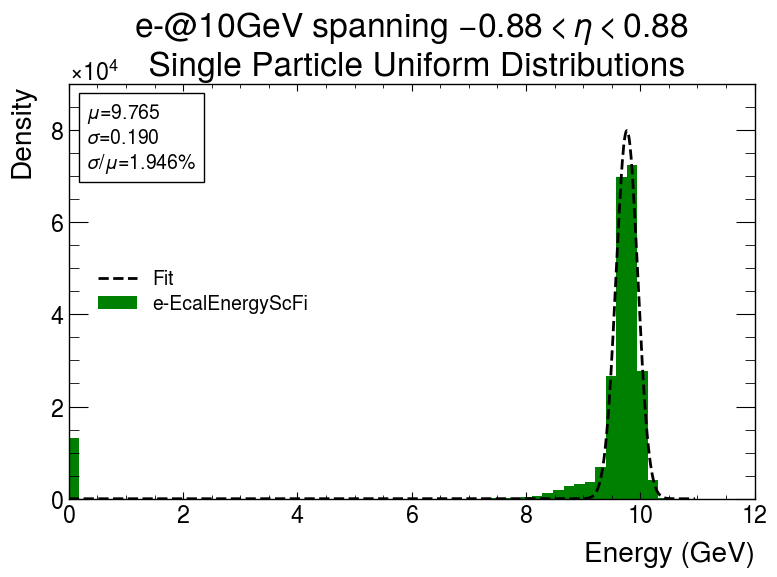

{'e-': {'45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergyBarrel ... 
Creating histogram named e-HCALEnergyEndcapP ... 
Creating histogram named e-HCALEnergyEndcapN ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 27406.473678610582, Mean = 3.189840471873641, Standard Deviation = 0.4690845002488176
Unc after diag:  [1.67760668e+03 3.31574770e-02 3.31573736e-02]
Full reso:  14.7+/-1.1


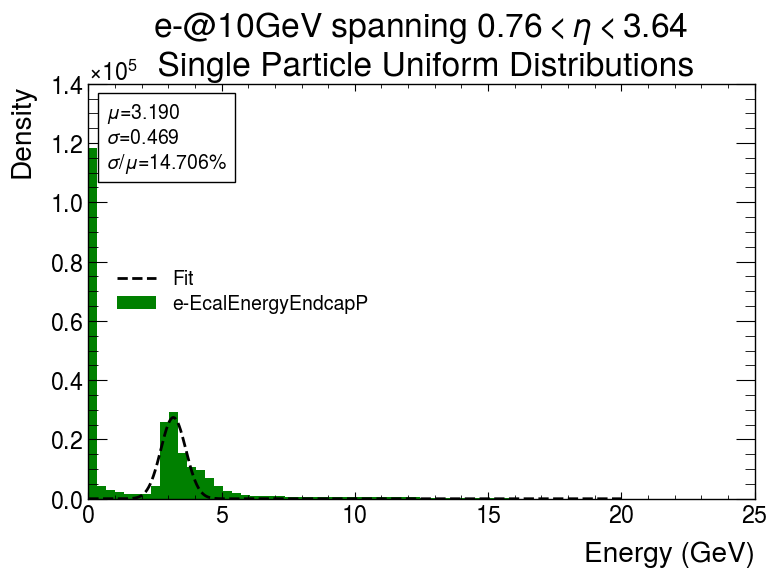

{'e-': {'3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergyBarrel ... 
Creating histogram named e-HCALEnergyEndcapP ... 
Creating histogram named e-HCALEnergyEndcapN ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 16612.464083935014, Mean = 9.94474225342883, Standard Deviation = 0.13432559780150768
Unc after diag:  [8.37593805e+02 8.42782756e-03 7.43650314e-03]
Full reso:  1.35+/-0.07


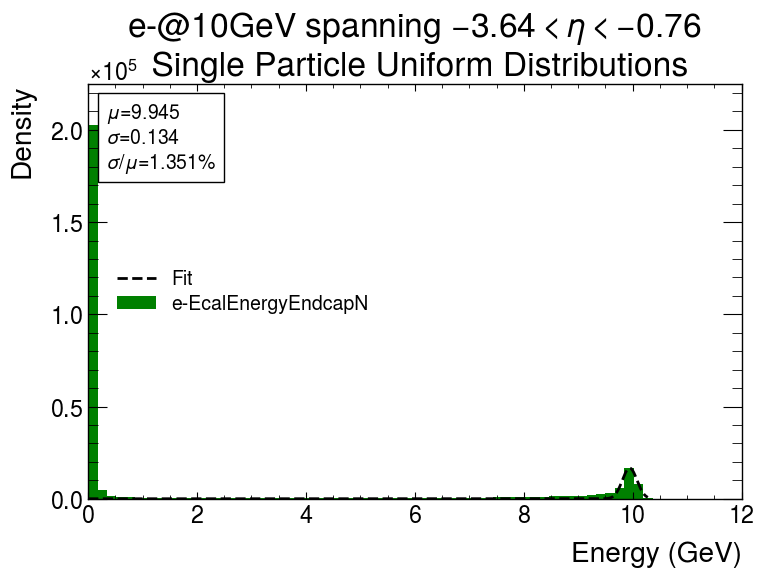

{'e-': {'130to177deg': {'10GeV': [1.3507197509839313, 0.07478699993786324]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergyBarrel ... 
Creating histogram named e-HCALEnergyEndcapP ... 
Creating histogram named e-HCALEnergyEndcapN ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 9.50705610277747, Mean = 0.1764826056867263, Standard Deviation = 0.0409937901511458
Unc after diag:  [0.60351398 0.00300456 0.00300619]
Full reso:  23.2+/-1.7


/home/rdhill13/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


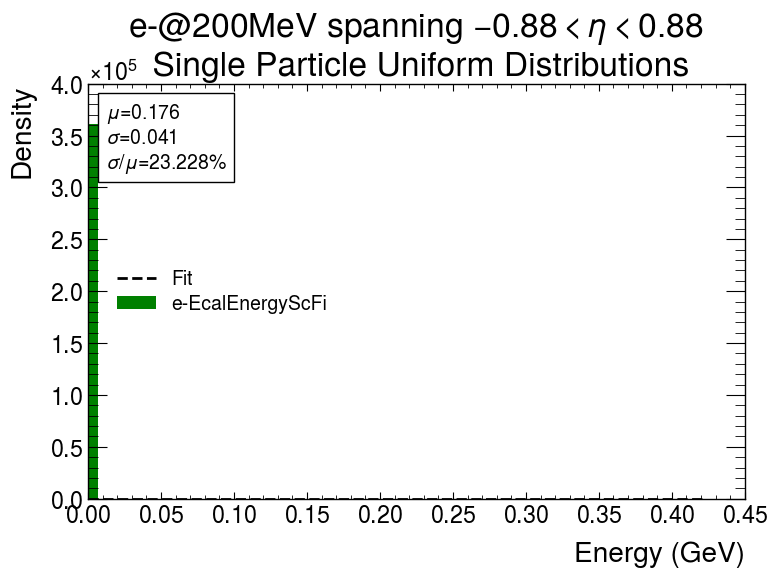

{'e-': {'130to177deg': {'10GeV': [1.3507197509839313, 0.07478699993786324]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923],
                       '200MeV': [23.228232602092096, 1.7486947819910024]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergyBarrel ... 
Creating histogram named e-HCALEnergyEndcapP ... 
Creating histogram named e-HCALEnergyEndcapN ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 2142.581110502107, Mean = 0.23061290797856207, Standard Deviation = -0.23186449289765657
Unc after diag:  [5.93978957e+01 1.25959

/home/rdhill13/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


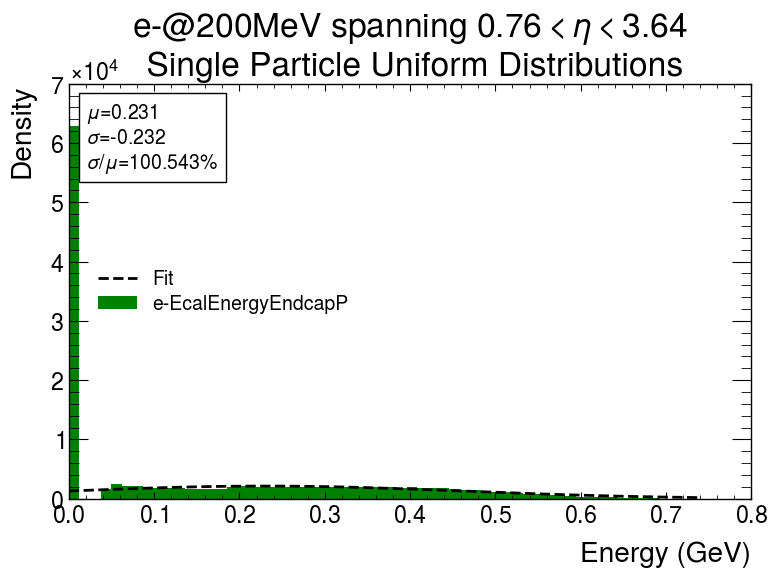

{'e-': {'130to177deg': {'10GeV': [1.3507197509839313, 0.07478699993786324]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967],
                     '200MeV': [100.54272110354327, 7.933813085284036]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923],
                       '200MeV': [23.228232602092096, 1.7486947819910024]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergyBarrel ... 
Creating histogram named e-HCALEnergyEndcapP ... 
Creating histogram named e-HCALEnergyEndcapN ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Parameters: 
Amplitude = 1751.2244677729893, Mean = 0.12567428534987587, Standard 

/home/rdhill13/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


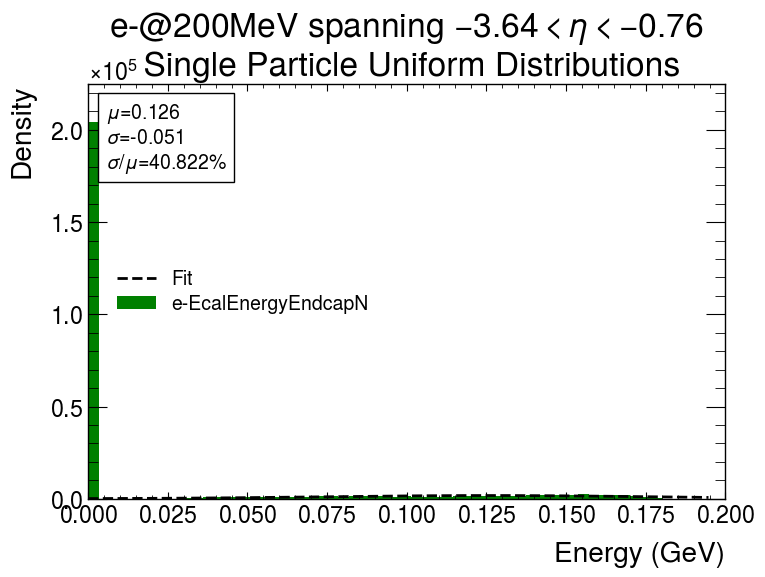

{'e-': {'130to177deg': {'10GeV': [1.3507197509839313, 0.07478699993786324],
                        '200MeV': [40.82187081008309, 5.372602956608945]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967],
                     '200MeV': [100.54272110354327, 7.933813085284036]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923],
                       '200MeV': [23.228232602092096, 1.7486947819910024]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergyBarrel ... 
Creating histogram named e-HCALEnergyEndcapP ... 
Creating histogram named e-HCALEnergyEndcapN ... 
Creating histogram named e-HCALEnergy ... 
Creating histogram named e-TotalEnergy ... 
Fit Paramete

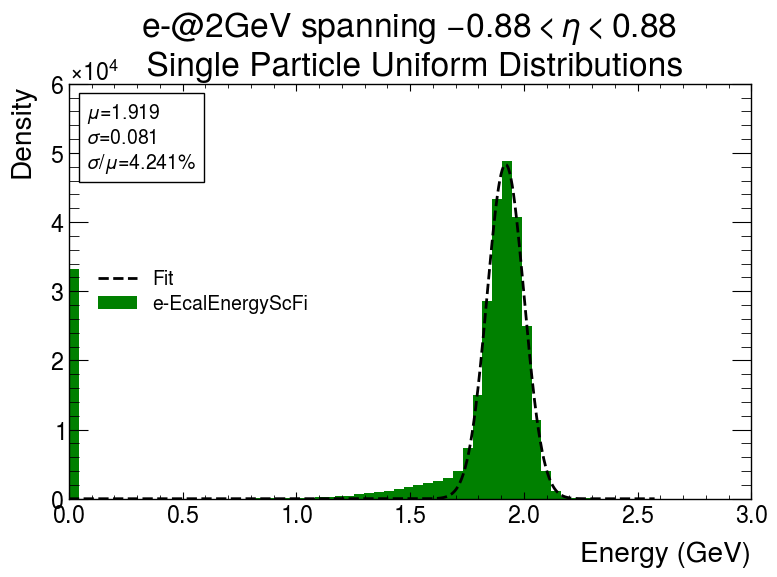

{'e-': {'130to177deg': {'10GeV': [1.3507197509839313, 0.07478699993786324],
                        '200MeV': [40.82187081008309, 5.372602956608945]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967],
                     '200MeV': [100.54272110354327, 7.933813085284036]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923],
                       '200MeV': [23.228232602092096, 1.7486947819910024],
                       '2GeV': [4.241056910305834, 0.06512452139354441]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergyBarrel ... 
Creating histogram named e-HCALEnergyEndcapP ... 
Creating histogram named e-HCALEnergyEndcapN ... 
Creating histogram named e

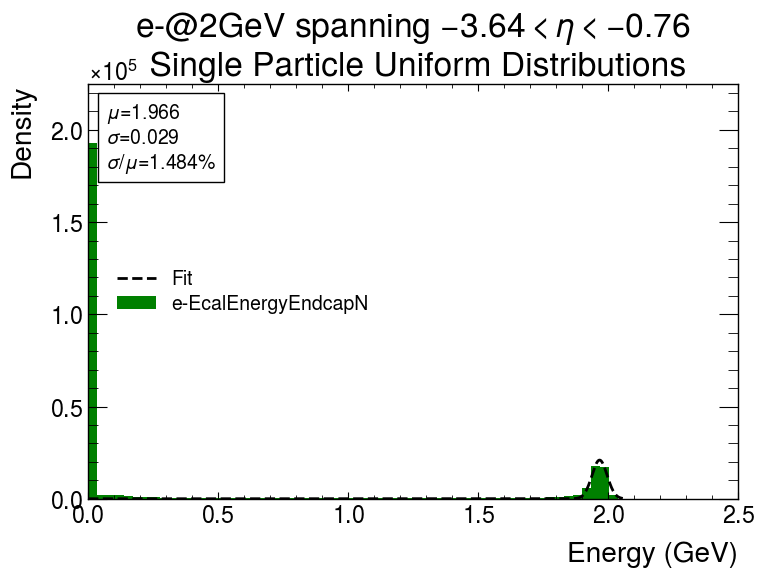

{'e-': {'130to177deg': {'10GeV': [1.3507197509839313, 0.07478699993786324],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967],
                     '200MeV': [100.54272110354327, 7.933813085284036]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923],
                       '200MeV': [23.228232602092096, 1.7486947819910024],
                       '2GeV': [4.241056910305834, 0.06512452139354441]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCALEnergyBarrel ... 
Creating histogram named e-HCALEnergyEndcapP ... 
C

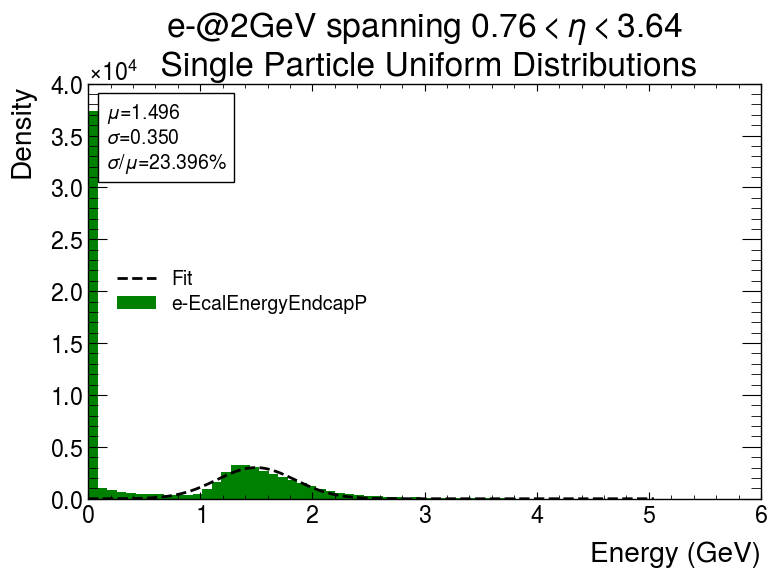

{'e-': {'130to177deg': {'10GeV': [1.3507197509839313, 0.07478699993786324],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923],
                       '200MeV': [23.228232602092096, 1.7486947819910024],
                       '2GeV': [4.241056910305834, 0.06512452139354441]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 
Creating histogram named e-ECALEnergy ... 
Creating histogram named e-HCA

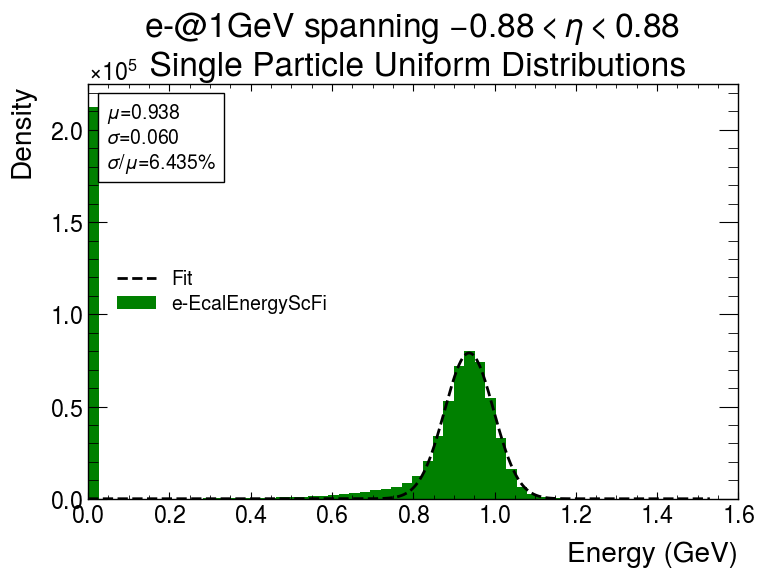

{'e-': {'130to177deg': {'10GeV': [1.3507197509839313, 0.07478699993786324],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923],
                       '1GeV': [6.435020040900248, 0.12682250861661223],
                       '200MeV': [23.228232602092096, 1.7486947819910024],
                       '2GeV': [4.241056910305834, 0.06512452139354441]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-ECALEnergyEndcapP ... 
Creating histogram named e-ECALEnergyEndcapN ... 


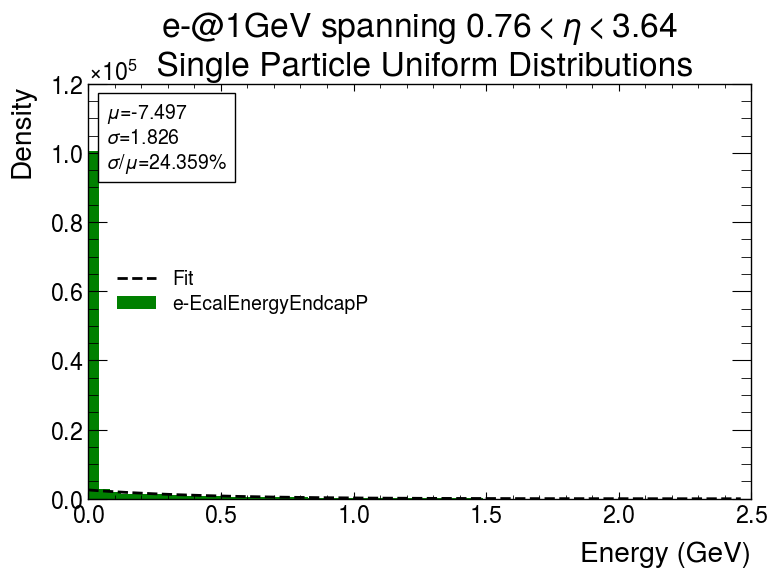

{'e-': {'130to177deg': {'10GeV': [1.3507197509839313, 0.07478699993786324],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923],
                       '1GeV': [6.435020040900248, 0.12682250861661223],
                       '200MeV': [23.228232602092096, 1.7486947819910024],
                       '2GeV': [4.241056910305834, 0.06512452139354441]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Creating histogram named e-ECALEnergyBarrel ... 
Creating histogram named e-E

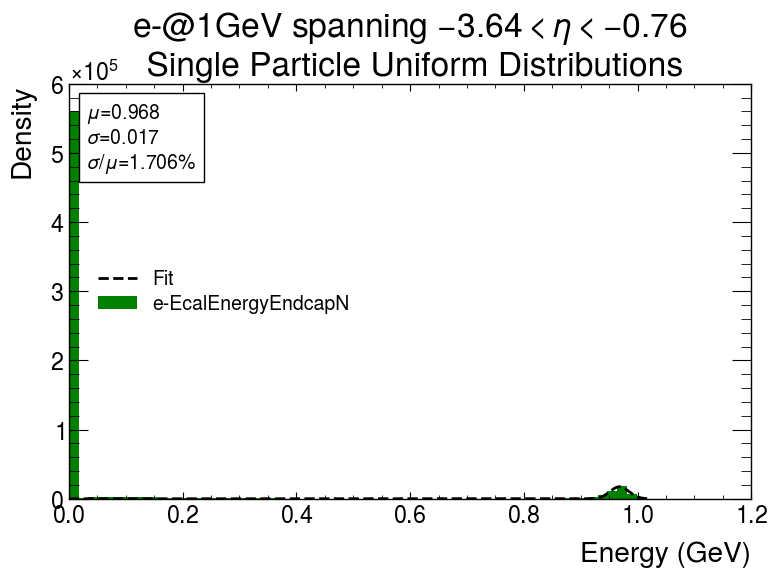

{'e-': {'130to177deg': {'10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923],
                       '1GeV': [6.435020040900248, 0.12682250861661223],
                       '200MeV': [23.228232602092096, 1.7486947819910024],
                       '2GeV': [4.241056910305834, 0.06512452139354441]}}}
Appending done.
Creating histogram named e-ECALEnergyFraction ... 
Creating histogram named e-ECALEnergyScFi ... 
Cr

/home/rdhill13/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


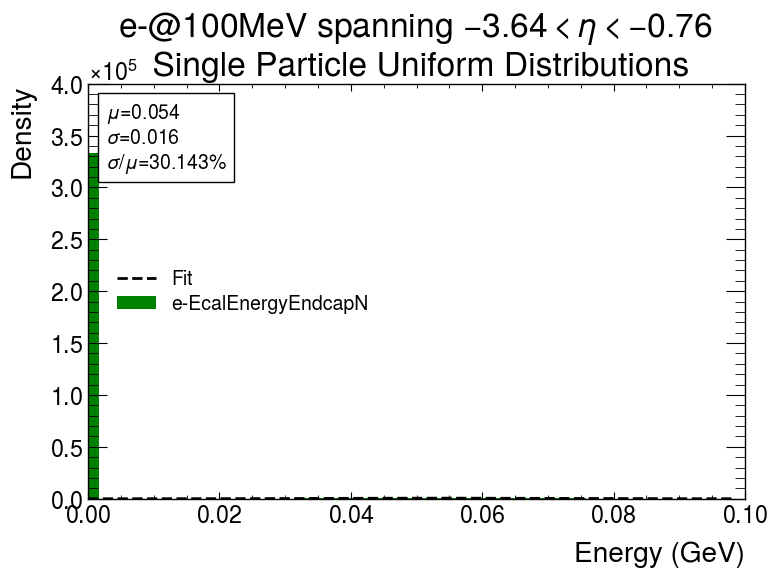

{'e-': {'130to177deg': {'100MeV': [30.1433136724805, 1.6250429661213146],
                        '10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986]},
        '45to135deg': {'10GeV': [1.946324484128679, 0.04988845655690923],
                       '1GeV': [6.435020040900248, 0.12682250861661223],
                       '200MeV': [23.228232602092096, 1.7486947819910024],
                       '2GeV': [4.241056910305834, 0.06512452139354441]}}}
Appending done.
Creating histogram named e

/home/rdhill13/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


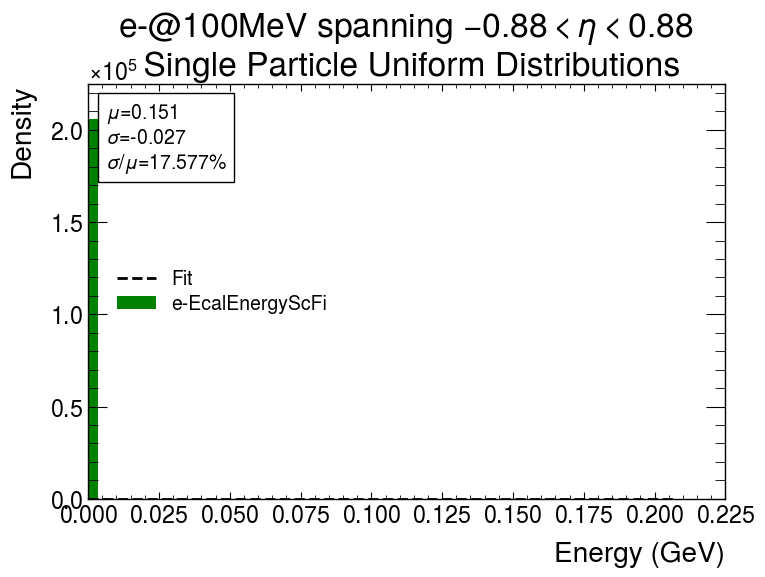

{'e-': {'130to177deg': {'100MeV': [30.1433136724805, 1.6250429661213146],
                        '10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989]},
        '3to50deg': {'10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986]},
        '45to135deg': {'100MeV': [17.57667296094814, 5.482334961977407],
                       '10GeV': [1.946324484128679, 0.04988845655690923],
                       '1GeV': [6.435020040900248, 0.12682250861661223],
                       '200MeV': [23.228232602092096, 1.7486947819910024],
                       '2GeV': [4.2410569103

/home/rdhill13/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


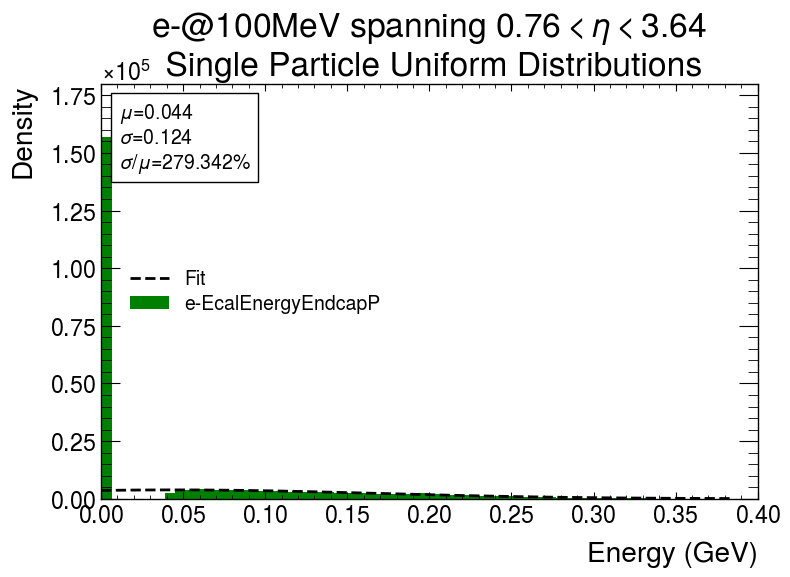

{'e-': {'130to177deg': {'100MeV': [30.1433136724805, 1.6250429661213146],
                        '10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989]},
        '3to50deg': {'100MeV': [279.3419670179597, 60.58655211567814],
                     '10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986]},
        '45to135deg': {'100MeV': [17.57667296094814, 5.482334961977407],
                       '10GeV': [1.946324484128679, 0.04988845655690923],
                       '1GeV': [6.435020040900248, 0.12682250861661223],
                       '200MeV': [23.22823260209

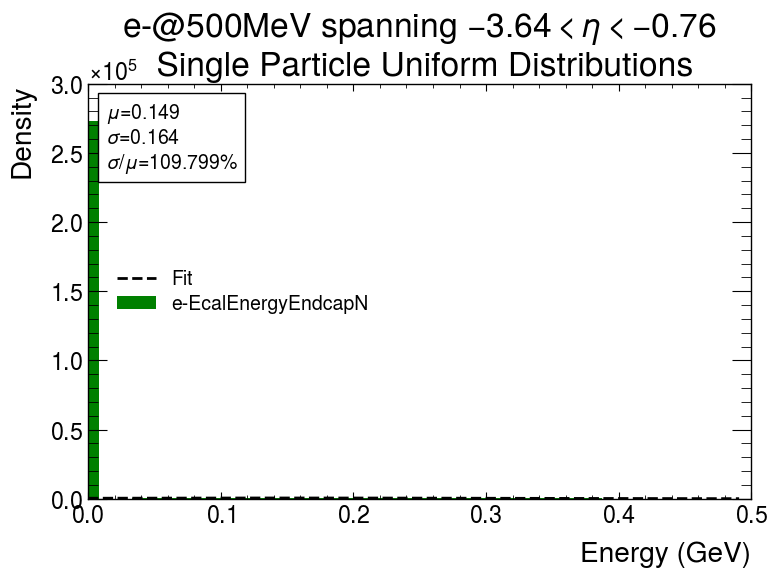

{'e-': {'130to177deg': {'100MeV': [30.1433136724805, 1.6250429661213146],
                        '10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989],
                        '500MeV': [109.79890323367734, 13.488514436412522]},
        '3to50deg': {'100MeV': [279.3419670179597, 60.58655211567814],
                     '10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986]},
        '45to135deg': {'100MeV': [17.57667296094814, 5.482334961977407],
                       '10GeV': [1.946324484128679, 0.04988845655690923],
                       '1GeV': [6.43502004090

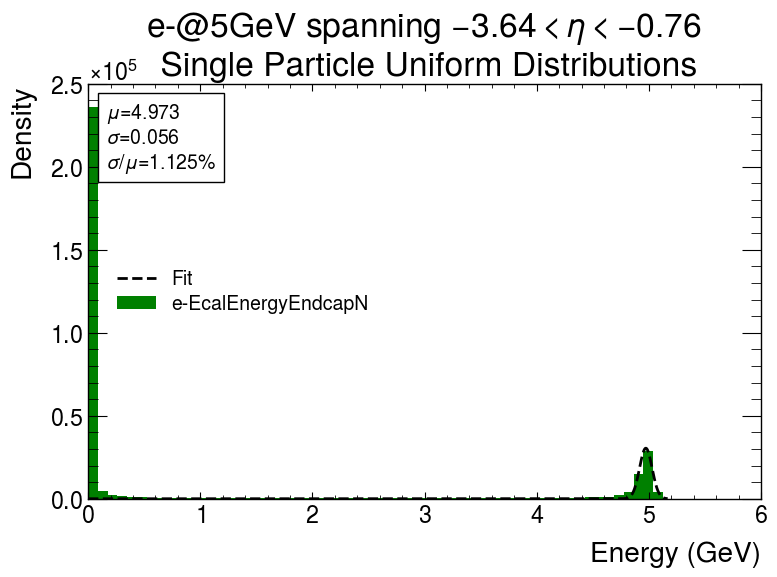

{'e-': {'130to177deg': {'100MeV': [30.1433136724805, 1.6250429661213146],
                        '10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989],
                        '500MeV': [109.79890323367734, 13.488514436412522],
                        '5GeV': [1.125130824069666, 0.03633254216518611]},
        '3to50deg': {'100MeV': [279.3419670179597, 60.58655211567814],
                     '10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986]},
        '45to135deg': {'100MeV': [17.57667296094814, 5.482334961977407],
                       '10GeV': [1.9463244841

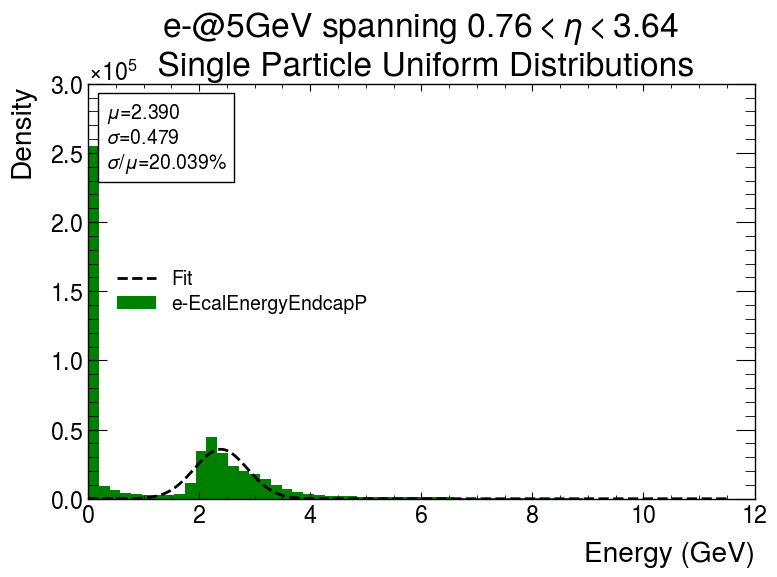

{'e-': {'130to177deg': {'100MeV': [30.1433136724805, 1.6250429661213146],
                        '10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989],
                        '500MeV': [109.79890323367734, 13.488514436412522],
                        '5GeV': [1.125130824069666, 0.03633254216518611]},
        '3to50deg': {'100MeV': [279.3419670179597, 60.58655211567814],
                     '10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986],
                     '5GeV': [20.03870913160002, 1.2587361295308042]},
        '45to135deg': {'100MeV': [17.57667296094

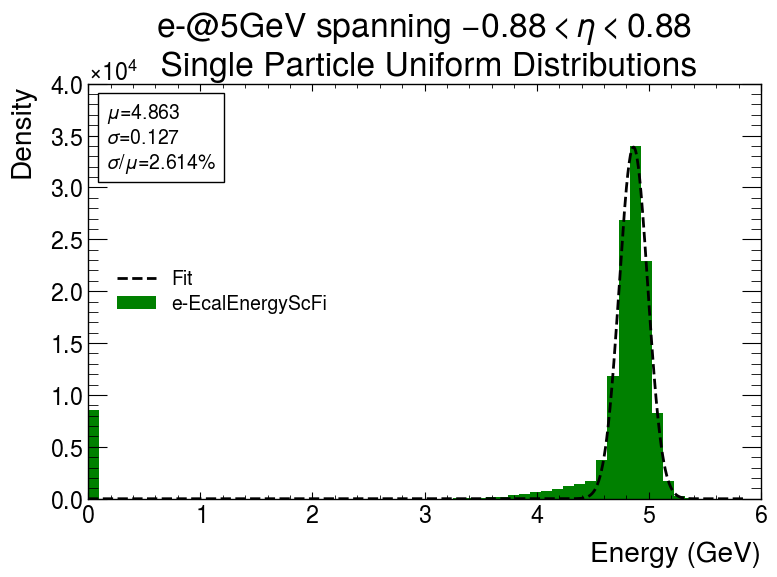

{'e-': {'130to177deg': {'100MeV': [30.1433136724805, 1.6250429661213146],
                        '10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989],
                        '500MeV': [109.79890323367734, 13.488514436412522],
                        '5GeV': [1.125130824069666, 0.03633254216518611]},
        '3to50deg': {'100MeV': [279.3419670179597, 60.58655211567814],
                     '10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '2GeV': [23.39567789088285, 0.8986450028589986],
                     '5GeV': [20.03870913160002, 1.2587361295308042]},
        '45to135deg': {'100MeV': [17.57667296094

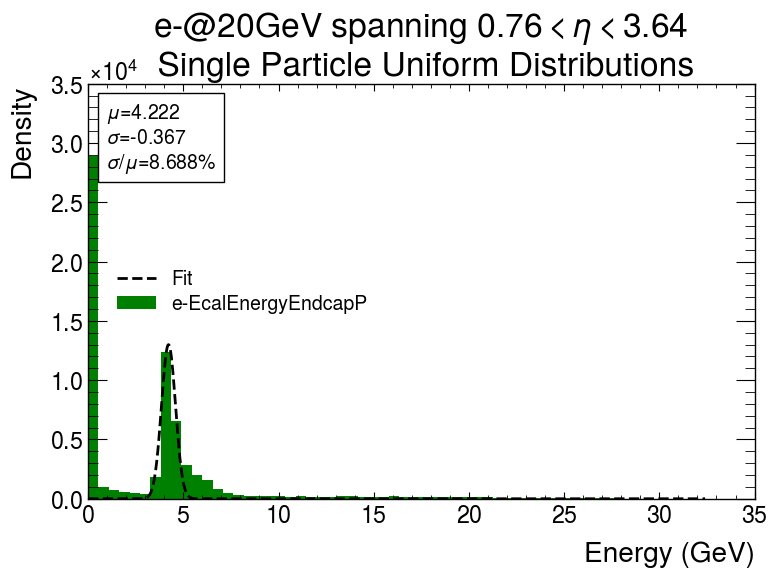

{'e-': {'130to177deg': {'100MeV': [30.1433136724805, 1.6250429661213146],
                        '10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989],
                        '500MeV': [109.79890323367734, 13.488514436412522],
                        '5GeV': [1.125130824069666, 0.03633254216518611]},
        '3to50deg': {'100MeV': [279.3419670179597, 60.58655211567814],
                     '10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '20GeV': [8.687963123848812, 0.5103065308910757],
                     '2GeV': [23.39567789088285, 0.8986450028589986],
                     '5GeV': [20.03870913160002,

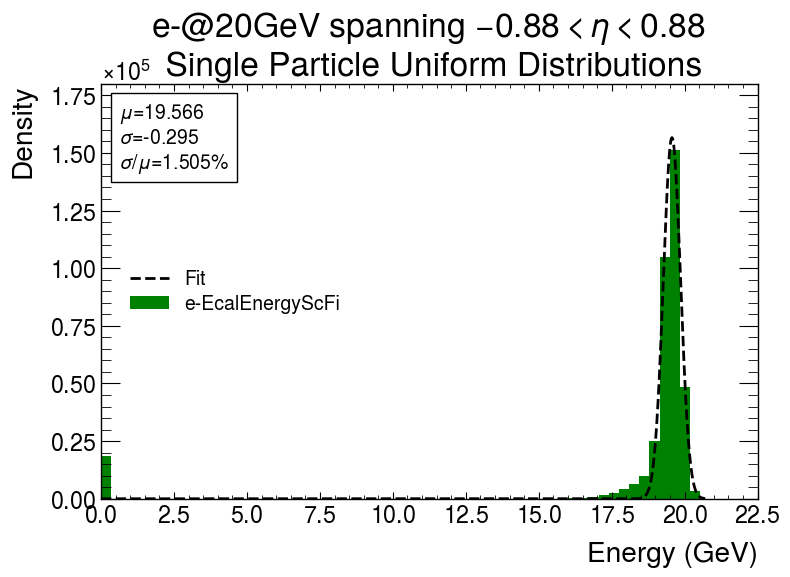

{'e-': {'130to177deg': {'100MeV': [30.1433136724805, 1.6250429661213146],
                        '10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '2GeV': [1.4836296963191167, 0.05142624008489989],
                        '500MeV': [109.79890323367734, 13.488514436412522],
                        '5GeV': [1.125130824069666, 0.03633254216518611]},
        '3to50deg': {'100MeV': [279.3419670179597, 60.58655211567814],
                     '10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '20GeV': [8.687963123848812, 0.5103065308910757],
                     '2GeV': [23.39567789088285, 0.8986450028589986],
                     '5GeV': [20.03870913160002,

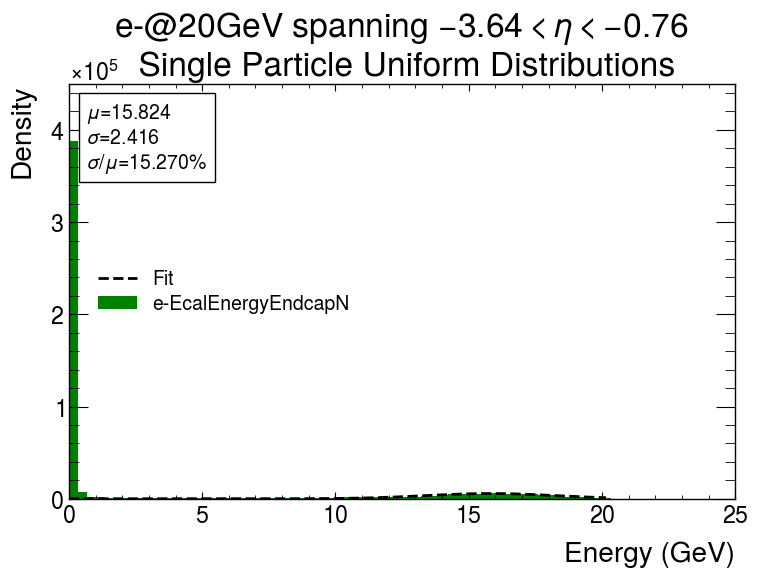

{'e-': {'130to177deg': {'100MeV': [30.1433136724805, 1.6250429661213146],
                        '10GeV': [1.3507197509839313, 0.07478699993786324],
                        '1GeV': [1.7061529173119636, 0.07152666968810373],
                        '200MeV': [40.82187081008309, 5.372602956608945],
                        '20GeV': [15.269621039240894, 1.3387756549042982],
                        '2GeV': [1.4836296963191167, 0.05142624008489989],
                        '500MeV': [109.79890323367734, 13.488514436412522],
                        '5GeV': [1.125130824069666, 0.03633254216518611]},
        '3to50deg': {'100MeV': [279.3419670179597, 60.58655211567814],
                     '10GeV': [14.705578676581524, 1.050647494471967],
                     '1GeV': [-24.358587895312425, 27.562093963863873],
                     '200MeV': [100.54272110354327, 7.933813085284036],
                     '20GeV': [8.687963123848812, 0.5103065308910757],
                     '2GeV': [23.3956778908

No handles with labels found to put in legend.


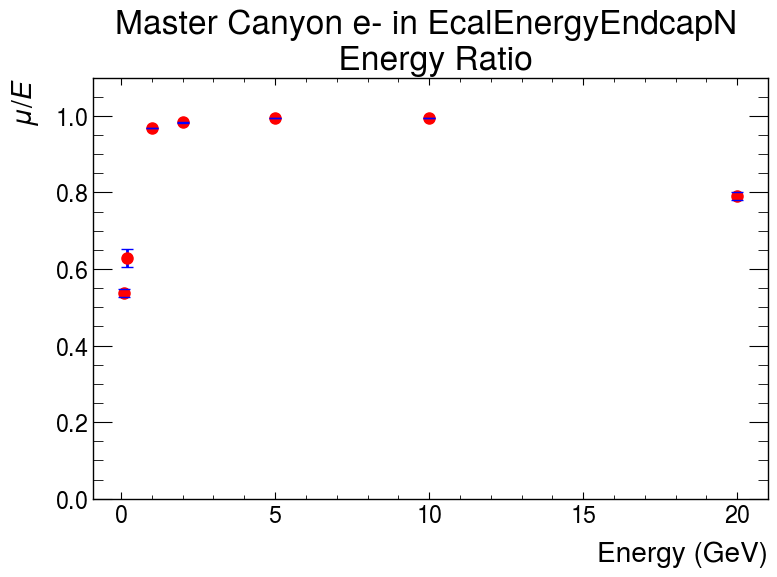

a=0.624, b=1.242, unc1=0.686, unc2=1.129


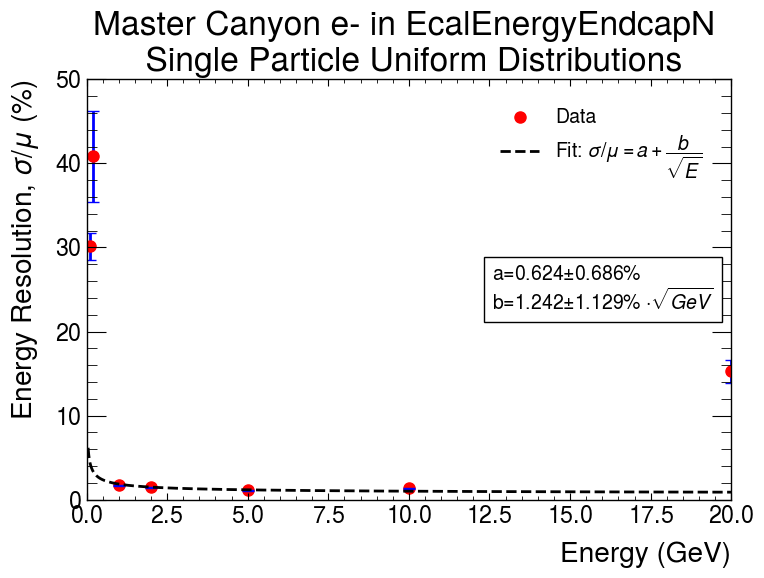

No handles with labels found to put in legend.


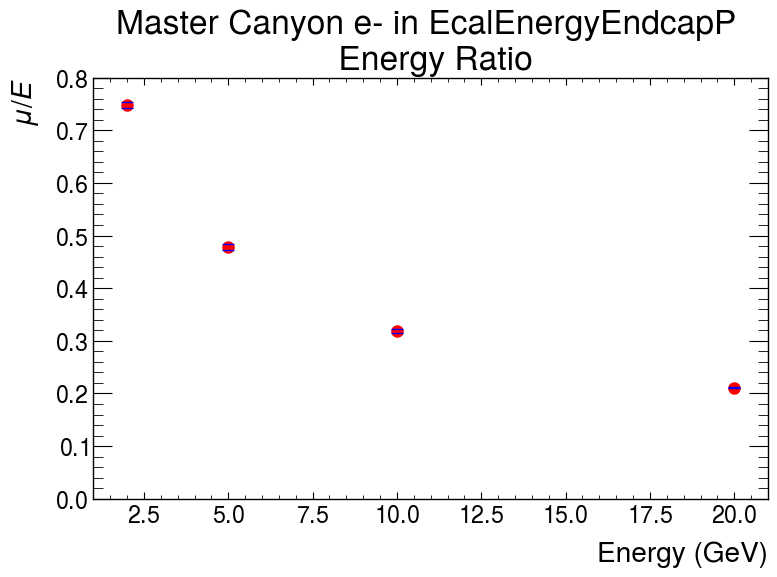

a=2.463, b=31.268, unc1=2.426, unc2=6.155


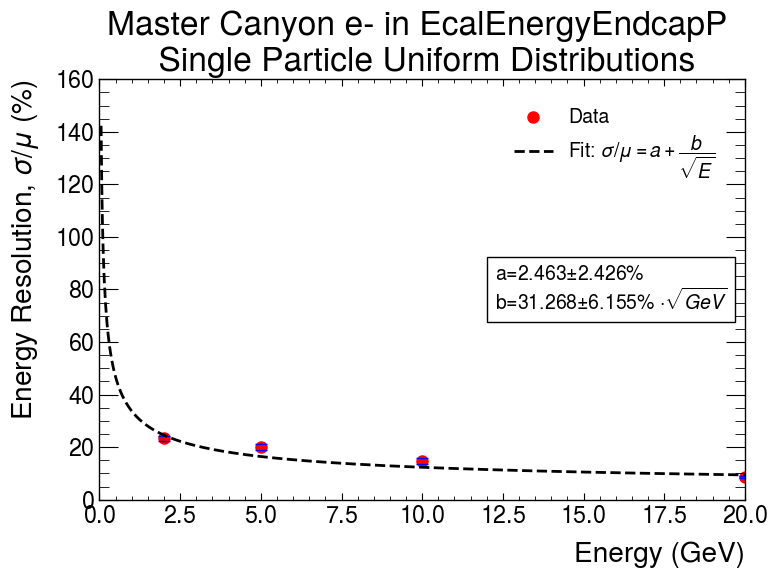

No handles with labels found to put in legend.


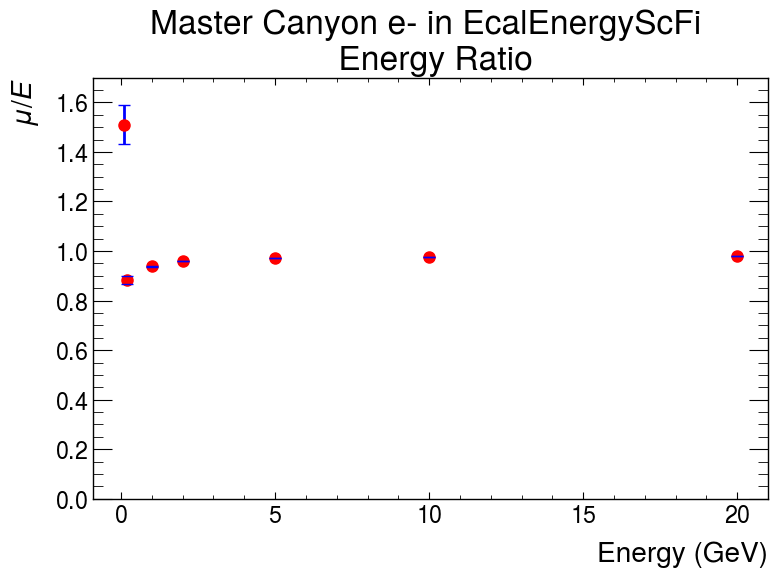

a=0.073, b=5.915, unc1=0.180, unc2=0.418


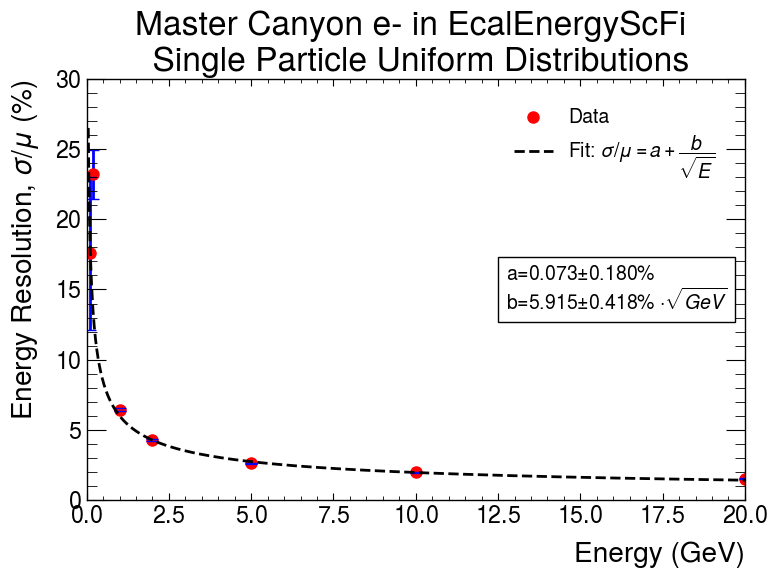

{'e-': {'130to177deg': {'100MeV': [0.5374335759155674, 0.011053159303527913],
                        '10GeV': [0.994474225342883, 0.0008427827564502445],
                        '1GeV': [0.968105884028249, 0.0006911578236333171],
                        '200MeV': [0.6283714267493793, 0.023834619677413522],
                        '20GeV': [0.791220150649637, 0.009937235966632782],
                        '2GeV': [0.9832144259734827, 0.0004728173070824275],
                        '5GeV': [0.9945319019274127, 0.00037089740201515654]},
        '3to50deg': {'10GeV': [0.31898404718736406, 0.0033157477016903004],
                     '20GeV': [0.21108987805531076, 0.001069945318021477],
                     '2GeV': [0.7480458171044361, 0.006533165315684402],
                     '5GeV': [0.47790447430606375, 0.005898259091388735]},
        '45to135deg': {'100MeV': [1.5101922851825607, 0.07977373908816532],
                       '10GeV': [0.976524651784065, 0.0004844414374788218],
        

In [ ]:
for i in tree.keys():  # particle
    pp = PdfPages(f'canyon/ECAL/ATHENA_FullSim_S3_EnergyResoMasterCanyon_{i}.pdf')
    pp2 = PdfPages(f'canyon/ECAL/ATHENA_FullSim_S3_EnergyResoMasterFittingCanyon_{i}.pdf')
    pp3 = PdfPages(f'canyon/ECAL/ATHENA_FullSim_S3_EnergyResoMasterCanyon_Ratio_{i}.pdf')
    
    resoTree = Tree()
    fitValTree = Tree()
    for j in tree[i].keys():  # energy
        rng = rngs[energies.index(j)]
        
        for k in tree[i][j].keys():  # region
            eta_range = etaRange[degrees.index(k)]
            files = tree[i][j][k]  # desired files for analysis
            #pprint.pprint(files)

            frames = []
            for batch in uproot.iterate(files, branches, step_size = '1 MB', library="np"):  # combine files into a master file
                frames.append(pd.DataFrame(batch))
            
            print("Appending done.")
            particle_df = pd.concat(frames)  
            particle_data, pp, mu, sigma, resoUnc, fitUnc = process(particle_df, i, k, pp=pp, eta_range=eta_range, eng=j, rng=rng)  # calculate the energy resolutions
            
            resoTree[i][k].setdefault(j, []).append((sigma/mu)*100)  # create tree of energy resolutions. switch j and k if we want it sorted by Particle -> energy -> region
            resoTree[i][k].setdefault(j, []).append(resoUnc)
            pprint.pprint(resoTree)
            
            fitValTree[i][k].setdefault(j, []).append(mu)
            fitValTree[i][k].setdefault(j, []).append(fitUnc[1])  # mu uncertainty
        
    print(f'{i} Master done.')
    pp.close()
    
    fitVal_df = pd.DataFrame(fitValTree)
    fitValDict = fitVal_df.to_dict()
    fitVal_df.to_json(f'canyon/ECAL/{i}MasterResoCanyon_FitVals.json')

#     readFitVals = pd.read_json(f'canyon/HCAL/{i}MasterResoCanyon_FitVals.json')
#     fitValDict = readFitVals.to_dict()
    
#    reso_df.to_csv(f'canyon/HCAL/{i}MasterResoCanyon.csv')
#    readReso = pd.read_csv(f'canyon/HCAL/{i}MasterResoCanyon.csv', index_col=0)
#    readReso[f'{i}'] = readReso[f'{i}'].map(ast.literal_eval)  # map to extract the dictionary values from a string.
    
    reso_df = pd.DataFrame(resoTree)
    resoDict = reso_df.to_dict()
    reso_df.to_json(f'canyon/ECAL/{i}MasterResoCanyon.json')
    
#     readReso = pd.read_json(f'canyon/HCAL/{i}MasterResoCanyon.json')
#     resoDict = readReso.to_dict()

    pp2, pp3 = resoFitting(pp2, pp3, fitValDict, resoDict)
    pp2.close(), pp3.close()

In [22]:
print("Canyon ECAL Ratios")
for i in tree.keys():
    readRatios = pd.read_json(f'canyon/ECAL/{i}MasterResoCanyon_Ratios.json')
    ratiosDict = readRatios.to_dict()
    pprint.pprint(ratiosDict)

Canyon ECAL Ratios
{'e-': {'130to177deg': {'100MeV': [0.5374335759000001, 0.0110531593],
                        '10GeV': [0.9944742253000001, 0.0008427828],
                        '1GeV': [0.9681058840000001, 0.0006911578],
                        '200MeV': [0.6283714267, 0.0238346197],
                        '20GeV': [0.7912201506000001, 0.009937236],
                        '2GeV': [0.9832144260000001, 0.0004728173],
                        '5GeV': [0.9945319019000001, 0.0003708974]},
        '3to50deg': {'10GeV': [0.3189840472, 0.0033157477],
                     '20GeV': [0.21108987810000002, 0.0010699453],
                     '2GeV': [0.7480458171000001, 0.0065331653],
                     '5GeV': [0.4779044743, 0.0058982591]},
        '45to135deg': {'100MeV': [1.5101922852, 0.0797737391],
                       '10GeV': [0.9765246518, 0.00048444140000000003],
                       '1GeV': [0.9375671202, 0.0011865919],
                       '200MeV': [0.8824130284, 0.0150227

In [23]:
print("Canyon ECAL Resolutions")
for i in tree.keys():
    readRatios = pd.read_json(f'canyon/ECAL/{i}MasterResoCanyon.json')
    ratiosDict = readRatios.to_dict()
    pprint.pprint(ratiosDict)

Canyon ECAL Resolutions
{'e-': {'130to177deg': {'100MeV': [30.1433136725, 1.6250429661],
                        '10GeV': [1.350719751, 0.0747869999],
                        '1GeV': [1.7061529173, 0.0715266697],
                        '200MeV': [40.8218708101, 5.3726029566],
                        '20GeV': [15.2696210392, 1.3387756549],
                        '2GeV': [1.4836296963, 0.0514262401],
                        '500MeV': [109.7989032337, 13.4885144364],
                        '5GeV': [1.1251308241, 0.0363325422]},
        '3to50deg': {'100MeV': [279.341967018, 60.5865521157],
                     '10GeV': [14.7055786766, 1.0506474945],
                     '1GeV': [-24.3585878953, 27.5620939639],
                     '200MeV': [100.5427211035, 7.9338130853],
                     '20GeV': [8.6879631238, 0.5103065309],
                     '2GeV': [23.3956778909, 0.8986450029],
                     '5GeV': [20.0387091316, 1.2587361295]},
        '45to135deg': {'100MeV': [17

In [24]:
print("Canyon HCAL Ratios")
for i in tree.keys():
    readRatios = pd.read_json(f'canyon/HCAL/{i}MasterResoCanyon_Ratios.json')
    ratiosDict = readRatios.to_dict()
    pprint.pprint(ratiosDict)

Canyon HCAL Ratios
{'e-': {'130to177deg': {'10GeV': [0.8815674854000001, 0.011424350100000001],
                        '1GeV': [1.4673349754, 0.0087582017],
                        '20GeV': [0.7913855131, 0.024871146900000002],
                        '2GeV': [1.1929425633, 0.0072434244],
                        '5GeV': [0.9805503827000001, 0.0070619440000000006]},
        '3to50deg': {'10GeV': [0.7950037516, 0.0085991304],
                     '2GeV': [0.7463016572000001, 0.0146845972],
                     '5GeV': [0.7599256335, 0.0078374903]},
        '45to135deg': {'5GeV': [0.1915948824, 0.0081895819]}}}
{'gamma': {'130to177deg': {'10GeV': [0.9715320869, 0.0219248321],
                           '20GeV': [0.8502293197, 0.028426124100000002],
                           '5GeV': [1.0847754793, 0.011654324300000001]},
           '3to50deg': {'10GeV': [0.8038727728, 0.0098324222],
                        '1GeV': [1.3799562893, 0.0421417378],
                        '2GeV': [0.822966354

In [25]:
print("Canyon HCAL Resolutions")
for i in tree.keys():
    readRatios = pd.read_json(f'canyon/HCAL/{i}MasterResoCanyon.json')
    ratiosDict = readRatios.to_dict()
    pprint.pprint(ratiosDict)

Canyon HCAL Resolutions
{'e-': {'130to177deg': {'100MeV': [100.0000099485, 6.6956e-06],
                        '10GeV': [41.0529467133, 1.4401656543999999],
                        '1GeV': [5.2564760212, 0.5977021723],
                        '200MeV': [100.0000099485, 6.6956e-06],
                        '20GeV': [53.2256131712, 3.8642286797],
                        '2GeV': [22.8375059067, 0.6230791265],
                        '500MeV': [100.0000099485, 6.6956e-06],
                        '5GeV': [32.187746195, 0.7587537289]},
        '3to50deg': {'100MeV': [100.0000099485, 6.6956e-06],
                     '10GeV': [10.9350592324, 1.1420436345],
                     '1GeV': [100.0, -1],
                     '200MeV': [100.0000099485, 6.6956e-06],
                     '20GeV': [73.5582640054, 158.8917197466],
                     '2GeV': [6.2813186826, 1.9715268730000002],
                     '5GeV': [16.8493110677, 1.0465336868]},
        '45to135deg': {'100MeV': [100.0000099485